In [21]:
# 시각화
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import missingno
from mlxtend.plotting import plot_decision_regions
from IPython.display import display

import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
py.init_notebook_mode(connected=True)
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# 기본 데이터 정리 및 처리
import numpy as np
import pandas as pd
import scipy
from scipy import stats
import json
import sklearn
import re

from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import pandas_profiling

# 전처리 및 머신 러닝 알고리즘
import lightgbm as lgb
import xgboost as xgb
from xgboost import plot_tree
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
from category_encoders import TargetEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier

# 모델 튜닝 및 평가
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn import model_selection
import gc

from sklearn.compose import make_column_selector
from bayes_opt import BayesianOptimization
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report 


In [24]:
#Loading the dataset
df_ = pd.read_csv('../input/pima/diabetes.csv')
df = df_.copy()

#Print the first 5 rows of the dataframe.
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [6]:
# df.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [212]:
df = df_.copy()
y = df[['Outcome']]
X = df.drop(['Outcome'], axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42, stratify=y)

# Custom data split: 0.7 / 0.3

In [213]:
cols_with_zero = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
df[cols_with_zero] = df[cols_with_zero].replace(0,np.NaN)
te = TargetEncoder(cols = cols_with_zero)
sc = MinMaxScaler()
columns = X_train.columns

X_train[cols_with_zero] = te.fit_transform(X_train[cols_with_zero], y_train)
X_train = pd.DataFrame(sc.fit_transform(X_train), columns=columns)
X_test[cols_with_zero] = te.transform(X_test[cols_with_zero], y_test)
X_test = pd.DataFrame(sc.transform(X_test), columns=columns)

X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
df_train = pd.concat([X_train, y_train], axis=1)

X_test.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
df_test = pd.concat([X_test, y_test], axis=1)

In [152]:
X[cols_with_zero] = te.transform(X[cols_with_zero], y)
X = pd.DataFrame(sc.transform(X), columns=columns)
df_proc = pd.concat([X, y], axis=1)
df_proc

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0       0.352941  0.648720       0.524877       0.808329  0.382832  0.501621   
1       0.058824  0.147835       0.564470       0.432971  0.382832  0.255130   
2       0.470588  0.648720       0.467402       0.478765  0.382832  0.349194   
3       0.058824  0.016923       0.564470       0.201981  0.027595  0.349194   
4       0.000000  0.508462       0.510057       0.808329  0.525824  0.349194   
..           ...       ...            ...            ...       ...       ...   
763     0.588235  0.262693       0.838027       0.762303  0.715418  1.000000   
764     0.117647  0.206303       0.570562       0.363673  0.382832  0.015736   
765     0.294118  0.209035       0.524877       0.201981  0.366216  0.040863   
766     0.058824  0.294902       0.145544       0.478765  0.382832  0.250537   
767     0.058824  0.209035       0.570562       0.346349  0.382832  0.597733   

     DiabetesPedigreeFunction       Age  Outcome  
0                    0.241871  0.483333        1  
1                    0.118931  0.166667        0  
2                    0.261915  0.183333        1  
3                    0.036971  0.000000        0  
4                    0.981737  0.200000        1  
..                        ...       ...      ...  
763                  0.038753  0.700000        0  
764                  0.114031  0.100000        0  
765                  0.071715  0.150000        0  
766                  0.118040  0.433333        1  
767                  0.102895  0.033333        0  

[768 rows x 9 columns]

In [100]:
from sklearn.neighbors import KNeighborsClassifier


test_scores = []
train_scores = []

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

## score that comes from testing on the same datapoints that were used for training
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1]


In [101]:
## score that comes from testing on the datapoints that were split in the beginning to be used for testing solely
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 69.26406926406926 % and k = [6]


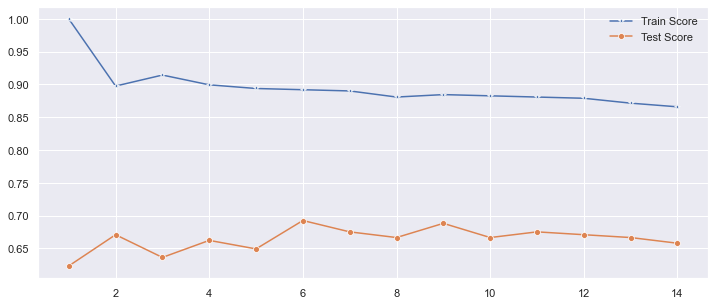

In [102]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,15),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,15),test_scores,marker='o',label='Test Score')

In [103]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(11)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.6753246753246753

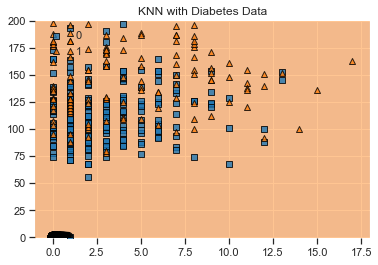

In [104]:
value = 20000
width = 20000
plot_decision_regions(X.values, y.values, clf=knn, legend=2, 
                      filler_feature_values={2: value, 3: value, 4: value, 5: value, 6: value, 7: value},
                      filler_feature_ranges={2: width, 3: width, 4: width, 5: width, 6: width, 7: width},
                      X_highlight=X_test.values)

# Adding axes annotations
#plt.xlabel('sepal length [cm]')
#plt.ylabel('petal length [cm]')
plt.title('KNN with Diabetes Data')
plt.show()

In [105]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix
#let us get the predictions using the classifier we had fit above
y_pred = knn.predict(X_test)
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['GT'], colnames=['Pred'], margins=True)

Pred    0   1  All
GT                
0     128  22  150
1      53  28   81
All   181  50  231

Text(0.5, 12.5, 'Predicted label')

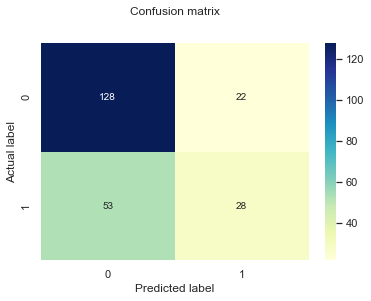

In [106]:
y_pred = knn.predict(X_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [107]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.85      0.77       150
           1       0.56      0.35      0.43        81

    accuracy                           0.68       231
   macro avg       0.63      0.60      0.60       231
weighted avg       0.66      0.68      0.65       231



In [108]:
from sklearn.metrics import roc_curve
y_pred_proba = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

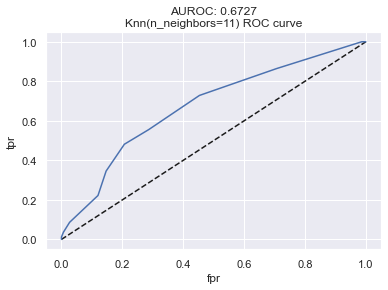

In [109]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
auroc = roc_auc_score(y_test,y_pred_proba)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title(f'AUROC: {auroc:.4f}\nKnn(n_neighbors=11) ROC curve')
plt.show()

# PyCaret

In [196]:
from pycaret.classification import *

In [217]:
df_train

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0       0.411765  0.359261       1.000000       0.565792  0.382832  0.400299   
1       0.352941  0.147835       0.468980       0.478765  0.382832  0.376079   
2       0.117647  0.000000       0.467402       0.808329  0.366216  0.716261   
3       0.117647  0.309492       0.300583       0.173104  0.140043  0.460728   
4       0.294118  0.411727       0.366502       0.478765  0.382832  0.093280   
..           ...       ...            ...            ...       ...       ...   
532     0.529412  0.187527       0.693150       0.527126  1.000000  0.573009   
533     0.235294  0.096532       0.485283       0.478765  0.382832  0.202865   
534     0.058824  0.294902       0.570562       0.330603  0.382832  0.040863   
535     0.352941  0.359261       0.488236       0.478765  0.382832  0.400299   
536     0.235294  0.514842       0.152696       0.173104  0.140043  0.202865   

     DiabetesPedigreeFunction       Age  Outcome  
0                    0.120713  0.333333        1  
1                    0.132739  0.350000        0  
2                    0.586192  0.216667        0  
3                    0.184410  0.050000        0  
4                    0.030735  0.450000        0  
..                        ...       ...      ...  
532                  0.078396  0.250000        1  
533                  0.136748  0.066667        0  
534                  0.059688  0.150000        0  
535                  0.086414  0.750000        1  
536                  0.090423  0.266667        0  

[537 rows x 9 columns]

In [218]:
exp_pima = setup(data=df_train, target = 'Outcome', session_id=123) 

In [219]:
top5 = compare_models(n_select=5)

In [220]:
top5

[RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                 max_iter=None, normalize=False, random_state=123, solver='auto',
                 tol=0.001),
 LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                            solver='svd', store_covariance=False, tol=0.0001),
 SGDClassifier(alpha=0.0001, average=False, class_weight=None,
               early_stopping=False, epsilon=0.1, eta0=0.001, fit_intercept=True,
               l1_ratio=0.15, learning_rate='optimal', loss='hinge',
               max_iter=1000, n_iter_no_change=5, n_jobs=-1, penalty='l2',
               power_t=0.5, random_state=123, shuffle=True, tol=0.001,
               validation_fraction=0.1, verbose=0, warm_start=False),
 LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=1000,
                    multi_class='auto', n_jobs=None, penalty='l2',
        

In [221]:
top5_tuned = []
for idx, model in enumerate(top5):
    top5_tuned.append(tune_model(model, optimize='AUC'))

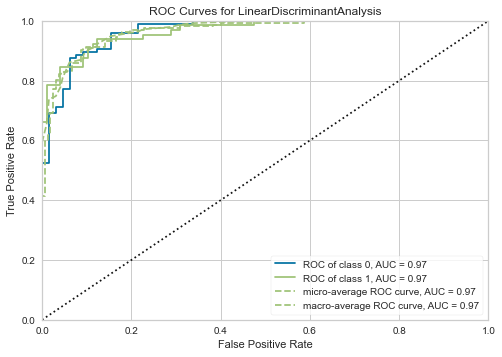

In [223]:
plot_model(top5_tuned[1], plot='auc')

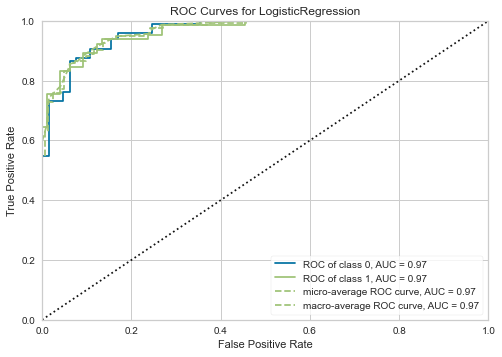

In [225]:
plot_model(top5_tuned[3], plot='auc')

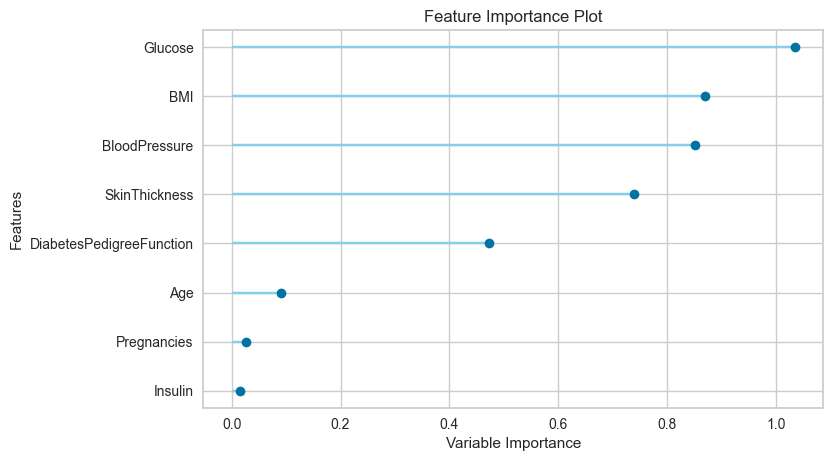

In [226]:
plot_model(top5_tuned[0], plot='feature')

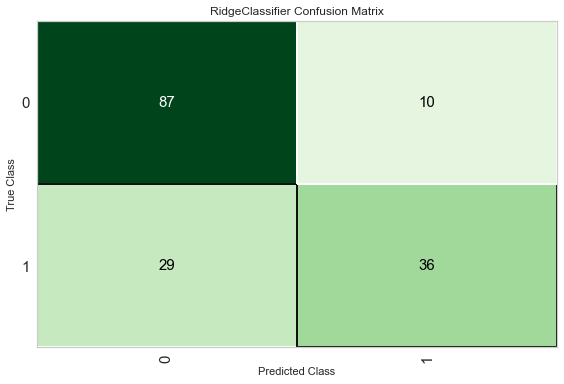

In [227]:
plot_model(top5_tuned[0], plot = 'confusion_matrix')

In [228]:
unseen_predictions = predict_model(top5_tuned[0], data=df_test)
unseen_predictions.head()

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.176471  0.411727       0.468980       0.201981  0.366216  0.400299   
1     0.235294  0.343892       0.467402       0.597487  0.366216  0.349194   
2     0.647059  0.262693       0.510057       0.565792  0.366216  0.460728   
3     0.235294  0.514842       0.693150       0.527126  0.382832  0.631144   
4     0.470588  0.209035       0.086711       0.757500  0.382832  0.631144   

   DiabetesPedigreeFunction       Age  Outcome  Label  
0                  0.106459  0.216667        1      1  
1                  0.365702  0.083333        1      0  
2                  0.075724  0.500000        1      0  
3                  0.209354  0.266667        1      0  
4                  0.069042  0.400000        1      1

In [231]:
from pycaret.utils import check_metric
check_metric(unseen_predictions['Outcome'], unseen_predictions['Label'], metric = 'AUC')

0.5823